In [199]:
from google.cloud import bigquery
import os

path = "/content/credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path

client = bigquery.Client()
dataset_ref = client.dataset("iowa_liquor_sales", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)
table_ref = dataset_ref.table("sales")
table = client.get_table(table_ref)

df = client.list_rows(table=table, max_results=1000000).to_dataframe()




Let's take a look on data

In [200]:
df.head(30)


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-29710100033,2020-08-25,2665,Hy-Vee / Waukee,1005 E Hickman Rd,Waukee,50263,POINT (-93.854477 41.615059),25,DALLAS,1081100,Coffee Liqueurs,370,PERNOD RICARD USA,67522,Kahlua Coffee Mini,12,50,6.60,9.90,2,19.80,0.10,0.02
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT (-93.65129 41.626668),77,Polk,1081030,COFFEE LIQUEURS,370,Pernod Ricard USA/Austin Nichols,67526,Kahlua Coffee Liqueur,12,750,11.99,17.99,36,647.64,27.00,7.13
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,Dubuque,52003,POINT (-90.705328 42.491862),31,DUBUQUE,1081100,Coffee Liqueurs,065,Jim Beam Brands,67557,Kamora Coffee Liqueur,12,1000,8.39,12.59,6,75.54,6.00,1.58
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1082100,Imported Cordials & Liqueur,421,SAZERAC COMPANY INC,964039,SOOH Aalborg Taffel Aquavit,6,750,11.00,16.50,30,495.00,22.50,5.94
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77,Polk,1701100,DECANTERS & SPECIALTY PACKAGES,420,"Moet Hennessy USA, Inc.",561,Ardbeg 10YR Exploration Pack,6,850,25.98,38.97,2,77.94,1.70,0.45
5,S25314400137,2015-04-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77,Polk,1081700,DISTILLED SPIRITS SPECIALTY,421,"Sazerac Co., Inc.",77487,Tortilla Gold Dss,12,1000,4.51,6.77,48,324.96,48.00,12.68
6,S11773400003,2013-04-22,3820,"Charlie's Wine and Spirits,",507 W 19th St,SIOUX CITY,51103,POINT (-96.420193 42.510535),97,Woodbury,1081400,TRIPLE SEC,434,Luxco-St Louis,86251,Juarez Triple Sec,12,1000,2.21,3.31,48,158.88,48.00,12.68
7,S22784200001,2014-12-08,3644,Wal-Mart 2764 / Altoona,3501 8TH ST SW,ALTOONA,50009,POINT (-93.505276 41.644195),77,Polk,1701100,DECANTERS & SPECIALTY PACKAGES,305,MHW Ltd,40614,Rumchata w/Thermal Cup,6,750,12.50,18.75,30,562.50,22.50,5.94
8,S08912500001,2012-11-13,4576,THE BOONEDOCKS,228 N HWY 71,ARNOLDS PARK,51331,POINT (-95.125928 43.370941),30,Dickinson,1011500,STRAIGHT RYE WHISKIES,255,Wilson Daniels Ltd.,27102,Templeton Rye,6,750,18.08,27.13,18,488.34,13.50,3.57
9,INV-23602600014,2019-12-02,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,None,11,BUENA VIST,1062100,Gold Rum,035,BACARDI USA INC,43037,Bacardi Gold,12,1000,9.50,14.25,2,28.50,2.00,0.52


In [201]:
df.describe()


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,12.178318,945.408873,9.398323,14.110303,10.930650,129.745426,9.762765,2.577720
std,7.810563,658.208399,8.819324,13.229067,27.495669,403.351800,31.710294,8.377024
min,1.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.050000,0.010000
25%,6.000000,750.000000,5.150000,7.750000,3.000000,33.000000,2.000000,0.530000
50%,12.000000,750.000000,7.600000,11.400000,6.000000,69.600000,9.000000,2.370000
75%,12.000000,1000.000000,11.490000,17.240000,12.000000,135.000000,10.500000,2.770000
max,312.000000,378000.000000,3537.300000,5305.950000,2700.000000,53976.000000,4252.500000,1123.390000


In [202]:
df.columns.tolist()

['invoice_and_item_number',
 'date',
 'store_number',
 'store_name',
 'address',
 'city',
 'zip_code',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_number',
 'vendor_name',
 'item_number',
 'item_description',
 'pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'bottles_sold',
 'sale_dollars',
 'volume_sold_liters',
 'volume_sold_gallons']

# Data Cleaning

In [203]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

In [204]:
df.dtypes

invoice_and_item_number     object
date                        object
store_number                object
store_name                  object
address                     object
city                        object
zip_code                    object
store_location              object
county_number               object
county                      object
category                    object
category_name               object
vendor_number               object
vendor_name                 object
item_number                 object
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [205]:
df['city'].value_counts()

Des Moines          44096
DES MOINES          41522
Cedar Rapids        34991
CEDAR RAPIDS        30448
Davenport           23125
                    ...  
LOHRVILLE               3
RUNNELLS                3
Colesburg               2
Colorado Springs        1
ALVORD                  1
Name: city, Length: 837, dtype: int64

##### We can see that there are register problem in the data

In [206]:
df['city'] = df['city'].str.lower()
print(df['city'].nunique())
df['city'].value_counts()


456


des moines          85618
cedar rapids        65439
davenport           44302
waterloo            31419
council bluffs      29812
                    ...  
washta                  5
allerton                4
earling                 3
alvord                  1
colorado springs        1
Name: city, Length: 456, dtype: int64

##### Let's do it for "same" columns

In [207]:
def register_preprocess(columns):
  for col in columns:
    df[col] = df[col].str.lower()

In [208]:
columns = ['city', 'category_name', 'item_description', 'county', 'vendor_name']

In [209]:
register_preprocess(columns=columns)

##### Lets calculate amount of missing values

In [210]:
df.isnull().sum()

invoice_and_item_number        0
date                           0
store_number                   0
store_name                     0
address                     3839
city                        3839
zip_code                    3840
store_location             95389
county_number               7644
county                      7643
category                    1419
category_name               2087
vendor_number                  0
vendor_name                    0
item_number                    0
item_description               0
pack                           0
bottle_volume_ml               0
state_bottle_cost              0
state_bottle_retail            0
bottles_sold                   0
sale_dollars                   0
volume_sold_liters             0
volume_sold_gallons            0
dtype: int64

##### Let's delete column 'store location'. This column is useless for our analysis and also contain a lot of missing values. Also we don't need "volume sold gallons" column for future analysis.

In [211]:
df = df.drop(['store_location','volume_sold_gallons'], 1)
df.isnull().sum()

invoice_and_item_number       0
date                          0
store_number                  0
store_name                    0
address                    3839
city                       3839
zip_code                   3840
county_number              7644
county                     7643
category                   1419
category_name              2087
vendor_number                 0
vendor_name                   0
item_number                   0
item_description              0
pack                          0
bottle_volume_ml              0
state_bottle_cost             0
state_bottle_retail           0
bottles_sold                  0
sale_dollars                  0
volume_sold_liters            0
dtype: int64

##### There are also missed values in other columns. Their amount relatively to size of the dataset is quite low thats why we can just delete rows which contain missing values.

In [212]:
df.shape

(1000000, 22)

In [213]:
df.dropna(inplace = True)
df.shape

(990300, 22)

##### We can preprocess data entries and separate them to 3 distinct columns.

In [214]:
df['date'] = pd.to_datetime(df['date'])

In [215]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [216]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
0,INV-29710100033,2020-08-25,2665,Hy-Vee / Waukee,1005 E Hickman Rd,waukee,50263,25,dallas,1081100,coffee liqueurs,370,pernod ricard usa,67522,kahlua coffee mini,12,50,6.60,9.90,2,19.80,0.1,2020,8,25
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,des moines,50310,77,polk,1081030,coffee liqueurs,370,pernod ricard usa/austin nichols,67526,kahlua coffee liqueur,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,dubuque,52003,31,dubuque,1081100,coffee liqueurs,065,jim beam brands,67557,kamora coffee liqueur,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,des moines,50314,77,polk,1082100,imported cordials & liqueur,421,sazerac company inc,964039,sooh aalborg taffel aquavit,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,des moines,50320,77,polk,1701100,decanters & specialty packages,420,"moet hennessy usa, inc.",561,ardbeg 10yr exploration pack,6,850,25.98,38.97,2,77.94,1.7,2014,12,18


In [217]:
print(df['date'].min())
print(df['date'].max())

2012-01-03 00:00:00
2020-10-30 00:00:00


### Basic analysis

In [218]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
0,12,50,6.60,9.90,2,19.80,0.1,2020,8,25
1,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,6,850,25.98,38.97,2,77.94,1.7,2014,12,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f288edb38>,
      dtype=object)

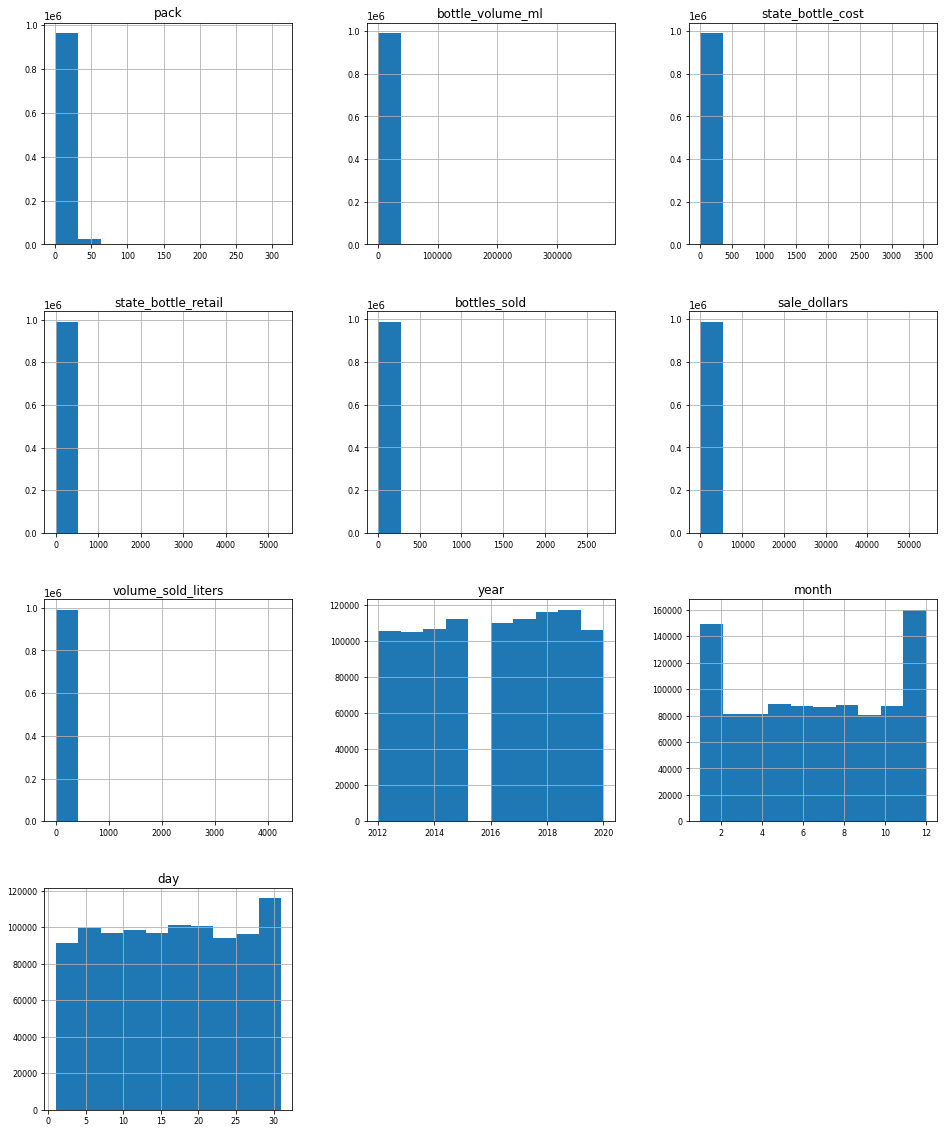

In [219]:
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

##### Top 10 sales in dollars depending on category

In [220]:
df_plot = df.groupby(['category_name'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))

In [221]:


fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

###### Top 10 sales in dollars dependent on city

In [222]:
df_plot = df.groupby(['city'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))


In [223]:
fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per city",
    xaxis_title=" city",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [224]:
def transform(a):
  return datetime.date(1900, a, 1).strftime('%B')

##### Distribution of sales during the year

In [225]:
df_plot = df.groupby(['month'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
new = []
for i in top_count.index:
  new.append(transform(i))

In [226]:
fig_reg = px.bar(top_count,x=new, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per month",
    xaxis_title=" Month",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

##### Also we can take a look at daily sales data

In [227]:
daily_sales = df.groupby('date', as_index=False)['sale_dollars'].sum()

In [228]:
daily_sales_sc = go.Scatter(x=daily_sales['date'], y=daily_sales['sale_dollars'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='date'), yaxis=dict(title='sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [229]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
0,INV-29710100033,2020-08-25,2665,Hy-Vee / Waukee,1005 E Hickman Rd,waukee,50263,25,dallas,1081100,coffee liqueurs,370,pernod ricard usa,67522,kahlua coffee mini,12,50,6.60,9.90,2,19.80,0.1,2020,8,25
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,des moines,50310,77,polk,1081030,coffee liqueurs,370,pernod ricard usa/austin nichols,67526,kahlua coffee liqueur,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,dubuque,52003,31,dubuque,1081100,coffee liqueurs,065,jim beam brands,67557,kamora coffee liqueur,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,des moines,50314,77,polk,1082100,imported cordials & liqueur,421,sazerac company inc,964039,sooh aalborg taffel aquavit,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,des moines,50320,77,polk,1701100,decanters & specialty packages,420,"moet hennessy usa, inc.",561,ardbeg 10yr exploration pack,6,850,25.98,38.97,2,77.94,1.7,2014,12,18


##### Hypothesis that people buy bigger volumes of cheaper liquers. Let's take a look at plot and correlation matrix between those 2 variables. 

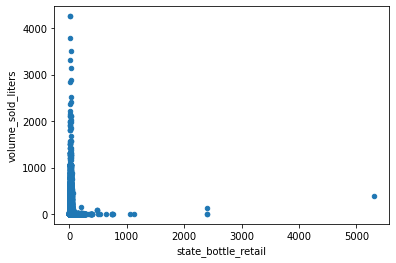

In [230]:
df.plot.scatter(x='state_bottle_retail',y='volume_sold_liters')
plt.show()


In [231]:
df[['state_bottle_retail','volume_sold_liters' ]].corr()

,state_bottle_retail,volume_sold_liters
state_bottle_retail,1.000000,0.008183
volume_sold_liters,0.008183,1.000000
